In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']
Data['GDP'].mean(axis=0)

567150.9466666667

기울기 :  [-0.07608556]
절편 :  1696.659456377495


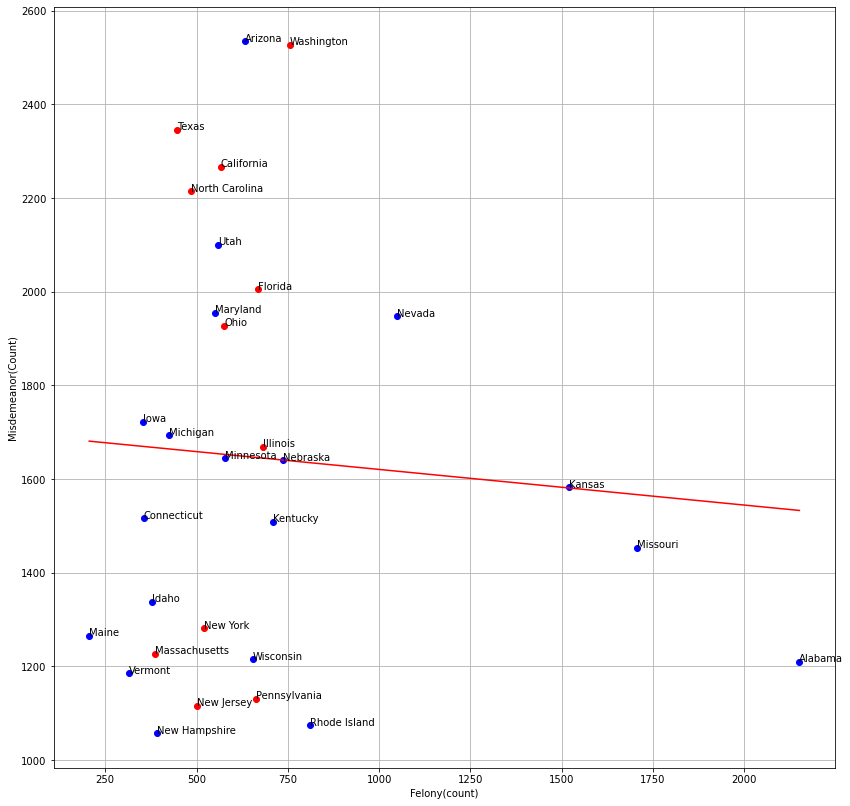

In [2]:
Data=Data.sort_values(by='Felony_Result')
Data=Data.reset_index()

plt.figure(figsize=(14,14))

for i in range(30):
    if Data['GDP'][i] >= Data['GDP'].mean(axis=0):
        plt.plot(Data['Felony_Result'][i],Data['Misdemeanor_Result'][i],'o',color='red')
    else:
        plt.plot(Data['Felony_Result'][i],Data['Misdemeanor_Result'][i],'o',color='blue')

for i, txt in enumerate(Data['State']):
    plt.annotate(txt, (Data['Felony_Result'][i], Data['Misdemeanor_Result'][i]))


Data_linear=LinearRegression()
Data_linear.fit(Data['Felony_Result'].values.reshape(-1,1),Data['Misdemeanor_Result'])
Data_prediction=Data_linear.predict(Data['Felony_Result'].values.reshape(-1,1))
plt.plot(Data['Felony_Result'],Data_linear.predict(Data['Felony_Result'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')  
print("기울기 : ",Data_linear.coef_)
print("절편 : ",Data_linear.intercept_)
plt.xlabel('Felony(count)')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [3]:
print('Score : ',Data_linear.score(Data['Felony_Result'].values.reshape(-1,1),Data['Misdemeanor_Result']))
print('MSE : ',mean_squared_error(Data_prediction,Data['Misdemeanor_Result']))
print('RMSE : ',mean_squared_error(Data_prediction,Data['Misdemeanor_Result'])**0.5)

Score :  0.005183466217915433
MSE :  192572.4524198771
RMSE :  438.8307787973368


In [4]:
Data_body=pd.DataFrame({'Misdemeanor':Data['Misdemeanor_Result'],'Felony':Data['Felony_Result']})

Data_spearmanr_corr=stats.spearmanr(Data_body.Felony,Data_body.Misdemeanor)

print('spearmanr_corr : {}'.format(Data_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.08387096774193549, pvalue=0.6594749201050072)


In [5]:
Data_pearson_corr=Data_body.corr(method='pearson')
Data_pearson_corr

,Misdemeanor,Felony
Misdemeanor,1.000000,-0.071996
Felony,-0.071996,1.000000


# Gini_coff

In [6]:
Gini_data=Data.filter(['State','Misdemeanor_Result','Felony_Result','Gini_coff'])
Gini_data=Gini_data.sort_values(by='Gini_coff')
Gini_data=Gini_data.reset_index()
#Gini_data

Felony 기울기 :  [2632.31079073]
Felony 절편 :  -554.3517041155304

Misdemeanor 기울기 :  [-1245.58323468]
Misdemeanor 절편 :  2228.108826047303


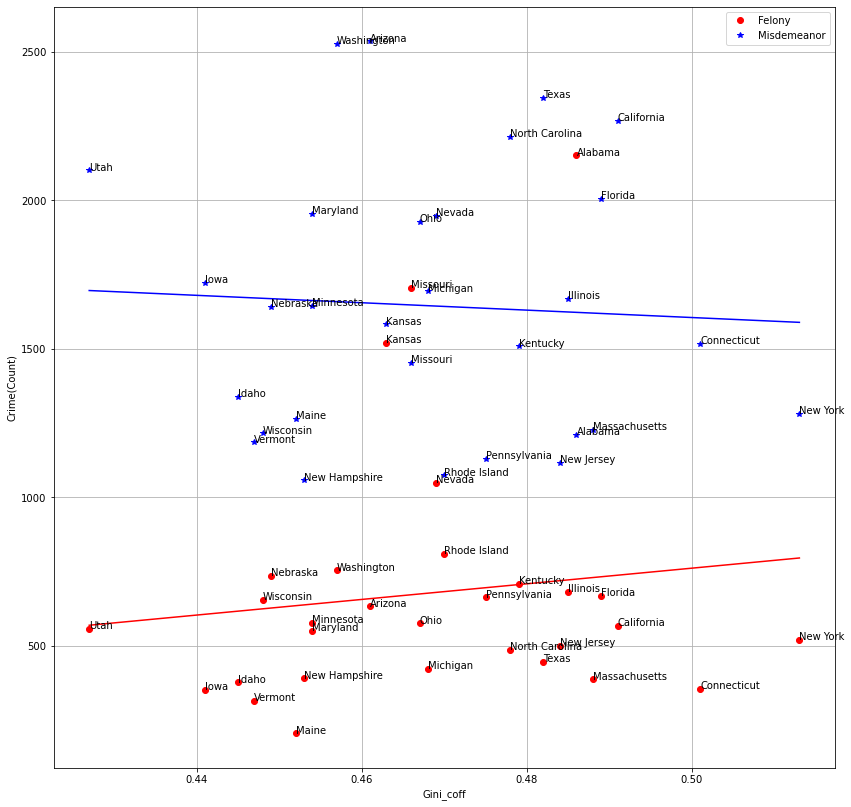

In [7]:
plt.figure(figsize=(14,14))
plt.plot(Gini_data['Gini_coff'],Gini_data['Felony_Result'],'o',label='Felony',color='red')
plt.plot(Gini_data['Gini_coff'],Gini_data['Misdemeanor_Result'],'*',label='Misdemeanor',color='blue')

for i, txt in enumerate(Gini_data['State']):
    plt.annotate(txt, (Gini_data['Gini_coff'][i], Gini_data['Felony_Result'][i]))
    plt.annotate(txt, (Gini_data['Gini_coff'][i], Gini_data['Misdemeanor_Result'][i]))


Gini_Mis_linear=LinearRegression()
Gini_Mis_linear.fit(Gini_data['Gini_coff'].values.reshape(-1,1),Gini_data['Misdemeanor_Result'])
Gini_Mis_prediction=Gini_Mis_linear.predict(Gini_data['Gini_coff'].values.reshape(-1,1))
plt.plot(Gini_data['Gini_coff'],Gini_Mis_linear.predict(Gini_data['Gini_coff'].values.reshape(-1,1)),color='blue')

Gini_Fel_linear=LinearRegression()
Gini_Fel_linear.fit(Gini_data['Gini_coff'].values.reshape(-1,1),Gini_data['Felony_Result'])
Gini_Fel_prediction=Gini_Fel_linear.predict(Gini_data['Gini_coff'].values.reshape(-1,1))
plt.plot(Gini_data['Gini_coff'],Gini_Fel_linear.predict(Gini_data['Gini_coff'].values.reshape(-1,1)),color='red')


#plt.xscale('log')
#plt.yscale('log')
print("Felony 기울기 : ",Gini_Fel_linear.coef_)
print("Felony 절편 : ",Gini_Fel_linear.intercept_)
print("\nMisdemeanor 기울기 : ",Gini_Mis_linear.coef_)
print("Misdemeanor 절편 : ",Gini_Mis_linear.intercept_)

plt.xlabel('Gini_coff')
plt.ylabel('Crime(Count)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
print('Mis_Score : ',Data_linear.score(Gini_data['Felony_Result'].values.reshape(-1,1),Gini_data['Misdemeanor_Result']))
print('Mis_MSE : ',mean_squared_error(Gini_Mis_prediction,Gini_data['Misdemeanor_Result']))
print('Mis_RMSE : ',mean_squared_error(Gini_Mis_prediction,Gini_data['Misdemeanor_Result'])**0.5)

print('\nFel_Score : ',Data_linear.score(Gini_data['Misdemeanor_Result'].values.reshape(-1,1),Gini_data['Felony_Result']))
print('Fel_MSE : ',mean_squared_error(Gini_Fel_prediction,Gini_data['Felony_Result']))
print('Fel_RMSE : ',mean_squared_error(Gini_Fel_prediction,Gini_data['Felony_Result'])**0.5)

Mis_Score :  0.0051834662179157664
Mis_MSE :  193005.01285218328
Mis_RMSE :  439.3233579633381

Fel_Score :  -4.603408910625043
Fel_MSE :  170777.90965170698
Fel_RMSE :  413.2528398592162


In [23]:
Gini_Mis_body=pd.DataFrame({'Misdemeanor':Gini_data['Misdemeanor_Result'],'Gini_coff':Gini_data['Gini_coff']})
Gini_Mis_spearmanr_corr=stats.spearmanr(Gini_Mis_body.Misdemeanor,Gini_Mis_body.Gini_coff)
print('Mis_spearmanr_corr : {}'.format(Gini_Mis_spearmanr_corr))


Gini_Fel_body=pd.DataFrame({'Gini_coff':Gini_data['Gini_coff'],'Felony':Gini_data['Felony_Result']})
Gini_Fel_spearmanr_corr=stats.spearmanr(Gini_Fel_body.Felony,Gini_Fel_body.Gini_coff)
print('\nFel_spearmanr_corr : {}'.format(Gini_Fel_spearmanr_corr))

Mis_spearmanr_corr : SpearmanrResult(correlation=0.007787295631678379, pvalue=0.9674227201655952)

Fel_spearmanr_corr : SpearmanrResult(correlation=0.17332295134507023, pvalue=0.35969337916154487)
